### verify install

In [610]:
import torch
import torchvision
import numpy as np
import math
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch .nn.functional as F
torch .set_printoptions(linewidth = 120)
torch . set_grad_enabled (True)
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from itertools import product
from collections import namedtuple
from collections import OrderedDict
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix
#from resources.plotcm import plot_confusion_matrix
import seaborn as sns
from itertools import product
from collections import OrderedDict, namedtuple

In [4]:
print (torch.__version__)

1.11.0


In [5]:
torch . cuda.is_available()

C:\Users\EGYPT\anaconda3\lib\site-packages\torch\cuda\__init__.py:82: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [6]:
torch.version.cuda

'11.3'

### Rank , axes , shape , tensors

In [7]:
#rank => how many indecice required
#Axes => lenght
#shape => lenght of each axis
dd = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

In [8]:
dd[0] #list

[1, 2, 3]

In [9]:
dd[0][1]#scaler

2

In [12]:
t = torch . tensor(dd)
display (t , t.shape)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

torch.Size([3, 3])

In [13]:
t.reshape(1,9)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [15]:
d = torch.Tensor()
display (d.dtype , d.device , d.layout)
# stride => how layed in memo


torch.float32

device(type='cpu')

torch.strided

In [20]:
data = np.array([1,2,3])
display (torch . Tensor(data),
        torch . tensor(data),
        torch . as_tensor(data),
         torch .from_numpy(data))

tensor([1., 2., 3.])

tensor([1, 2, 3], dtype=torch.int32)

tensor([1, 2, 3], dtype=torch.int32)

tensor([1, 2, 3], dtype=torch.int32)

In [21]:
display (torch.eye(2),
        torch . ones(2,2),
        torch . rand (2,2))

tensor([[1., 0.],
        [0., 1.]])

tensor([[1., 1.],
        [1., 1.]])

tensor([[0.1014, 0.9738],
        [0.3181, 0.0039]])

In [23]:
t1=torch . Tensor(data)#constructor
t2=torch . tensor(data)#factory ***
t3=torch . as_tensor(data)#factory *** 
t4=torch .from_numpy(data)#factory

In [24]:
data [0] = 0
data [1] = 0
data [2] = 0

In [25]:
display (t1,t2)

tensor([1., 2., 3.])

tensor([1, 2, 3], dtype=torch.int32)

In [26]:
display (t3,t4)

tensor([0, 0, 0], dtype=torch.int32)

tensor([0, 0, 0], dtype=torch.int32)

In [35]:
dd =torch.tensor( [
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
], dtype = torch.float32)

In [36]:
dd.shape

torch.Size([4, 3])

In [37]:
axis = len (dd.shape)
axis

2

In [38]:
dd.numel()

12

In [40]:
print (dd. reshape(1,12 ))
print (dd.reshape(1,12).shape)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])
torch.Size([1, 12])


In [43]:
#squeez to remove rank 
print (dd. reshape(1,12).squeeze())
print (dd.reshape(1,12).squeeze().shape)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])
torch.Size([12])


In [44]:
def flatten (t) :
    t = t.reshape(1,-1)
    t = t.squeeze()
    return t

In [46]:
flatten (dd)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

## CNN Flatten Operation

In [50]:
t1 = torch.tensor ([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],])
t2 = torch .tensor ([
    [2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2]
])
t3 = torch . tensor ([[3,3,3,3],[3,3,3,3],[3,3,3,3],[3,3,3,3]])

In [53]:
t= torch.stack ((t1,t2,t3))
t.shape

torch.Size([3, 4, 4])

In [54]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [55]:
t=t.reshape(3,1,4,4)
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [56]:
display (
t[0],t[0][0] , t[0][0][0] ,
    t[0][0][0][0] # first pixil value in first row in first color channel in first image )

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

tensor([1, 1, 1, 1])

tensor(1)

In [59]:
t.flatten(start_dim = 1).shape #1 is second axis  (color channel)

torch.Size([3, 16])

In [60]:
t.flatten (start_dim = 1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

 ## element wise tensor operation

In [61]:
t1 = torch.tensor([
    [1,2],[3,4]
] , dtype = torch .float32)

t2 = torch.tensor([
    [9,8],[7,6]
] , dtype = torch .float32)

In [62]:
display (t1[0][0] , t2[0][0])

tensor(1.)

tensor(9.)

In [63]:
t1+t2

tensor([[10., 10.],
        [10., 10.]])

In [65]:
# broadcasting is element wise
#lower rank to higher rank
#البرودكاستنج حوار كبير سيكا cheack Blog / J lang 

In [71]:
t = torch.tensor ([[0,1,0],[2,0,2],[0,3,0]] ,
                  dtype = torch.float32)
display (t.sum() # reduction operation
         , t.numel() ,
         t.sum().numel(),
        t.sum().numel() < t.numel()
        ,
        t.prod()
        ,t.mean(),
        t.std())

tensor(8.)

9

1

True

tensor(0.)

tensor(0.8889)

tensor(1.1667)

In [72]:
t1 = torch.tensor ([[1,1,1,1],[2,2,2,2],[3,3,3,3]])

In [74]:
display (t1.sum(dim=0)
        ,t1.sum (dim =1))

tensor([6, 6, 6, 6])

tensor([ 4,  8, 12])

In [77]:
display (t1[0] , t1[1] ,t1[2] ,t1[0] +t1[1]+t1[2] ,t1.sum(dim=0))

tensor([1, 1, 1, 1])

tensor([2, 2, 2, 2])

tensor([3, 3, 3, 3])

tensor([6, 6, 6, 6])

tensor([6, 6, 6, 6])

In [79]:
display (t1[0].sum() , t1[1].sum() ,t1[2].sum() ,t1.sum(dim=1))

tensor(4)

tensor(8)

tensor(12)

tensor([ 4,  8, 12])

In [83]:
t = torch.tensor ([[1,1,1,1],[2,2,2,2],[3,3,3,5]] ,dtype = torch.float32)

In [84]:
display (t.max(),t.argmax(),t.flatten())

tensor(5.)

tensor(11)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 5.])

In [88]:
display(t.mean().item() ,t.mean())

2.1666667461395264

tensor(2.1667)

# Fashion-MNSIT

In [90]:
train_set = torchvision.datasets.FashionMNIST(
root = './data/FashionMNIST', #Extract
train = True,
download = True,
transform=transforms.Compose([transforms.ToTensor()]))#Transform


Extracting ./data/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw




Extracting ./data/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw




Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw




Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



In [92]:
train_loader = torch.utils.data.DataLoader(train_set , batch_size=10)#Load 

In [96]:
display 
(len (train_set),
 
 train_set.train_labels,
 
 train_set.train_labels.bincount() #Frequancy distrubution for each set
)#oversampling problem (classe unbalanced) => sol 

(60000,
 tensor([9, 0, 0,  ..., 3, 0, 5]),
 tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

#### Sample

In [98]:
sample = next(iter(train_set))

In [100]:
display
(len(sample)  #image - label
  ,type (sample)
)

(2, tuple)

In [105]:
image , label  = sample

In [108]:
display 
(image.shape,
 label
)

(torch.Size([1, 28, 28]), 9)

label : 9


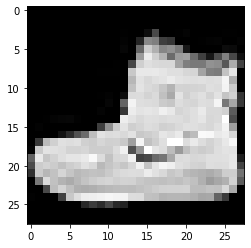

In [109]:
plt . imshow (image .squeeze() , cmap = 'gray')
print ('label :' , label)

#### Batch

In [113]:
batch = next (iter (train_loader)) # loader is 10 batches 


In [116]:
display
(len (batch),
 type(batch)
)

(2, list)

In [115]:
images , labels = batch

In [118]:
?? display

In [119]:
 display 
(images.shape,
 labels.shape
)

(torch.Size([10, 1, 28, 28]), torch.Size([10]))

labels : tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


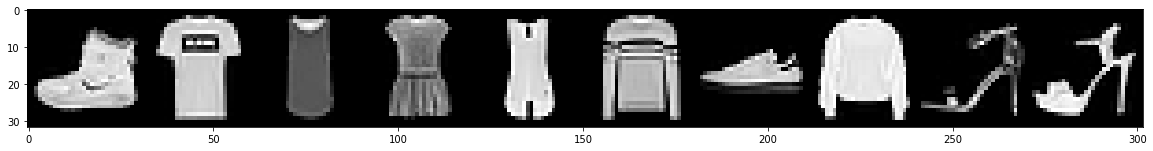

In [135]:
grid = torchvision.utils.make_grid(images , 10)

plt . figure (figsize=(20 , 20))
plt . imshow (np.transpose(grid , (1,2,0)))
print ('labels :' , labels)

## Build PyTorch CNN 

In [138]:
class lol :
    def __init__ (self , name):
        self.name = name
        
    def set_name(self,name):
        self.name = name

In [141]:
lizard = lol('deep')
print (lizard . name)
lizard.set_name("Abyusif")
print (lizard.name)

deep
Abyusif


* Extend the nn.Module base class

* define layers as class attribtes 

* implement the forward() method 

In [183]:
class NNetwork :
    def __init__(self):
        self.layer = None
    def forward (self , t) :
        t = self.layer(t)
        return t

In [217]:
network = Network()
network


Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [218]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [219]:
network.conv1.weight

Parameter containing:
tensor([[[[-1.2918e-01, -7.9693e-02,  1.9659e-01,  1.6470e-01, -7.4741e-02],
          [ 8.4300e-02,  9.4277e-02, -3.7775e-03,  1.6222e-01, -4.5514e-02],
          [-1.1312e-01, -5.8000e-02, -9.9779e-02,  5.0724e-02, -9.3916e-02],
          [-9.5102e-03, -6.2357e-02, -1.3922e-01, -7.7774e-02, -9.7812e-03],
          [ 1.6447e-01, -1.2118e-01,  1.0276e-01, -1.5360e-01, -4.4578e-02]]],


        [[[ 7.6922e-02, -1.4352e-01, -1.2363e-01,  3.9324e-02, -1.6756e-01],
          [ 4.5758e-03, -8.2292e-02, -1.1357e-01, -4.3210e-02,  1.2228e-01],
          [-6.2496e-02,  1.3758e-01, -1.0009e-01, -6.3030e-03,  1.9139e-01],
          [ 1.5568e-01,  1.0017e-01,  1.2090e-01,  9.0364e-02,  8.1711e-04],
          [ 1.1048e-01,  4.6944e-02,  1.5190e-01,  5.4025e-02, -4.4737e-02]]],


        [[[ 1.2784e-01, -8.7024e-02,  1.4584e-01,  1.9156e-01, -1.7430e-01],
          [ 1.7495e-01,  7.2041e-02,  9.8636e-02, -1.9692e-01,  7.6117e-02],
          [-8.3176e-02,  1.1985e-01,  7.1989e-

In [220]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [221]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [222]:
network.fc1.weight.shape

torch.Size([120, 192])

In [223]:
for name , param in network.named_parameters():
    print(name , '\t\t' , param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [224]:
in_feature = torch.tensor([1,2,3,4] , dtype=torch.float32)

In [225]:
weight_matrix =torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
] , dtype = torch .float32)


In [226]:
weight_matrix . matmul (in_feature) #map from 4D , 3D  in => out

tensor([30., 40., 50.])

In [227]:
weight_matrix

tensor([[1., 2., 3., 4.],
        [2., 3., 4., 5.],
        [3., 4., 5., 6.]])

In [228]:
fc = nn.Linear (in_features=4 , out_features=3) #3*4 weight matrix

In [229]:
fc . weight = nn.Parameter (weight_matrix)

In [230]:
fc(in_feature) #randvalues  +- bais , Bais = False

tensor([30.2495, 40.1789, 50.4786])

In [231]:
fc = nn.Linear(in_features=4 , out_features=3)
t = torch . tensor([1,2,3,4],dtype = torch.float32)
output = fc(t)
print (output)

tensor([ 1.0012, -0.4372, -2.4151])


 ### Pass Image Batch,sample to PyTorch CNN

In [232]:
torch . set_grad_enabled(False)

In [358]:
#Extend the nn.Module base class
class Network (nn.Module):
    def __init__ (self):
        super ().__init__() 
                                 #colorfeature    #feature maps
        self.conv1  = nn.Conv2d(in_channels=1 , out_channels=6, kernel_size=5)#filter
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4 ,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features= 60)
        self.out = nn.Linear(in_features=60 , out_features=10)
                                                #10 prediction
        
    def forward (self , t ):
        """
        #(1) input layer
        t=t
        #(2)hidden conv layer
        t= self.conv(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernal_size=2,stride=2)
        
        #(3) hidden conv layer
        t=self.conv2(t)
        t=F.relu(t)
        t= F.maxpool2d(t, kernal_size=2,stride=2)
        
        #(4) hidden layer
        t = t.reshape (-1,12*4*4)
        t= self.fc1(t)
        t=F.relu(t)
        
        #(5) hidden layer 
        t = self.fc2(t)
        t = F.relu (t)
        
        #(6) hidden layer 
        t = self.out(t)
        t = F.softmax(t,dim = 1)
        """
        t = F.relu (self . conv1(t))
        t = F.max_pool2d (t , kernel_size=2,stride=2)
        
        t = F.relu (self . conv2(t))
        t = F.max_pool2d (t , kernel_size=2,stride=2)
        
        t = F.relu(self.fc1(t.reshape(-1 , 12 *4* 4)))
        t = F.relu(self . fc2(t))
        t = self.out(t)
        
        
        
        
        
        return t
    
    

In [359]:
nnetwork =  Network()

In [360]:
sample = next(iter(train_set))

In [361]:
image , label = sample 
image.shape

torch.Size([1, 28, 28])

In [362]:
image . unsqueeze(0).shape 

torch.Size([1, 1, 28, 28])

In [363]:
pred = nnetwork(image.unsqueeze(0))

In [364]:
pred

tensor([[ 0.1219, -0.0616, -0.1365,  0.0633,  0.0227, -0.0449,  0.0558,  0.0610, -0.0203, -0.0804]],
       grad_fn=<AddmmBackward0>)

In [365]:
label

9

In [366]:
pred.argmax(dim = 1)

tensor([0])

In [367]:
 F.softmax(pred , dim = 1)
    

tensor([[0.1129, 0.0939, 0.0872, 0.1064, 0.1022, 0.0955, 0.1056, 0.1062, 0.0979, 0.0922]], grad_fn=<SoftmaxBackward0>)

In [368]:
F.softmax (pred , dim=1).sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [369]:
train_loader = torch.utils.data.DataLoader(train_set , batch_size=10)#Load 

In [370]:
train_loader = torch.utils.data.DataLoader(train_set , batch_size=10)#Load 
batch = next(iter(train_loader))
images , labels = batch
display (images.shape , labels.shape)

torch.Size([10, 1, 28, 28])

torch.Size([10])

In [371]:
preds = nnetwork (images)
preds.shape

torch.Size([10, 10])

In [372]:
preds

tensor([[ 0.1219, -0.0616, -0.1365,  0.0633,  0.0227, -0.0449,  0.0558,  0.0610, -0.0203, -0.0804],
        [ 0.1139, -0.0627, -0.1335,  0.0628,  0.0162, -0.0489,  0.0518,  0.0571, -0.0122, -0.0813],
        [ 0.1220, -0.0568, -0.1314,  0.0710,  0.0190, -0.0484,  0.0547,  0.0674, -0.0176, -0.0662],
        [ 0.1208, -0.0575, -0.1312,  0.0723,  0.0137, -0.0475,  0.0554,  0.0618, -0.0137, -0.0726],
        [ 0.1158, -0.0611, -0.1364,  0.0653,  0.0190, -0.0541,  0.0575,  0.0576, -0.0101, -0.0825],
        [ 0.1147, -0.0616, -0.1314,  0.0627,  0.0176, -0.0484,  0.0578,  0.0638, -0.0127, -0.0777],
        [ 0.1216, -0.0563, -0.1353,  0.0608,  0.0195, -0.0440,  0.0564,  0.0624, -0.0142, -0.0738],
        [ 0.1149, -0.0654, -0.1333,  0.0643,  0.0188, -0.0515,  0.0584,  0.0599, -0.0120, -0.0861],
        [ 0.1235, -0.0617, -0.1341,  0.0645,  0.0196, -0.0453,  0.0512,  0.0605, -0.0222, -0.0640],
        [ 0.1257, -0.0574, -0.1284,  0.0646,  0.0176, -0.0464,  0.0573,  0.0579, -0.0063, -0.0662]],

In [373]:
preds . argmax(dim = 1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [374]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [375]:
preds . argmax(dim = 1) . eq(labels)

tensor([False,  True,  True, False,  True, False, False, False, False, False])

In [376]:
def get_num_correct (preds , labels):
    return preds . argmax(dim = 1) . eq(labels).sum().item()

In [377]:
get_num_correct(preds , labels)

3

### CNN Output Size Formula (Square)
* Suppose we have an n * n input.
* Suppose we have an f * f filter.
* Suppose we have a padding of P and a stride of S.

        O = (n-f+2p/s) + 1

# Trainning 

* Get batch from the training set.
* Pass batch to network.
* Calculate the loss (difference between the predicted values and the true values).
* Calculate the gradient of the loss function w.r.t the network's weights.
* Update the weights using the gradients to reduce the loss.
* Repeat steps 1-5 until one epoch is completed.
* Repeat steps 1-6 for as many epochs required to reach the minimum loss.

In [403]:
#Extend the nn.Module base class
class Network (nn.Module):
    def __init__ (self):
        super ().__init__() 
                                 #colorfeature    #feature maps
        self.conv1  = nn.Conv2d(in_channels=1 , out_channels=6, kernel_size=5)#filter
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4 ,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features= 60)
        self.out = nn.Linear(in_features=60 , out_features=10)
                                                #10 prediction
        
    def forward (self , t ):
        """
        #(1) input layer
        t=t
        #(2)hidden conv layer
        t= self.conv(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernal_size=2,stride=2)
        
        #(3) hidden conv layer
        t=self.conv2(t)
        t=F.relu(t)
        t= F.maxpool2d(t, kernal_size=2,stride=2)
        
        #(4) hidden layer
        t = t.reshape (-1,12*4*4)
        t= self.fc1(t)
        t=F.relu(t)
        
        #(5) hidden layer 
        t = self.fc2(t)
        t = F.relu (t)
        
        #(6) hidden layer 
        t = self.out(t)
        t = F.softmax(t,dim = 1)
        """
        t = F.relu (self . conv1(t))
        t = F.max_pool2d (t , kernel_size=2,stride=2)
        
        t = F.relu (self . conv2(t))
        t = F.max_pool2d (t , kernel_size=2,stride=2)
        
        t = F.relu(self.fc1(t.reshape(-1 , 12 *4* 4)))
        t = F.relu(self . fc2(t))
        t = self.out(t)
     
        return t
    
    

In [404]:
train_loader = torch.utils.data.DataLoader(train_set , batch_size=100)#Load 
batch = next(iter(train_loader))
images , labels = batch
display (images.shape , labels.shape)

torch.Size([100, 1, 28, 28])

torch.Size([100])

In [405]:
NNetwork = Network()

#### Calculating the loss

In [406]:
preds = NNetwork(images)
loss = F.cross_entropy(preds , labels)
loss.item()

2.3103418350219727

#### Calculating the gradients 

In [407]:
print (NNetwork.conv1.weight.grad)

None


In [408]:
loss.backward()

In [409]:
print (NNetwork.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


#### Optimizer 

In [410]:
optimizer = optim .Adam (NNetwork.parameters() , lr = 0.01)

In [411]:
loss .item()

2.3103418350219727

In [412]:
get_num_correct(preds,labels)

10

In [422]:
optimizer.step () # update weight

In [423]:
preds = NNetwork(images)
loss = F.cross_entropy(preds , labels)


In [424]:
loss.item()

2.273371696472168

In [425]:
get_num_correct(preds,labels)

15

##### singel Batch trainning 

In [454]:
Networkk = Network()

train_loader = torch.utils.data.DataLoader(train_set , batch_size=100)#Load 
optimizer = optim .Adam (Networkk.parameters() , lr = 0.01)

for epoch in range(5):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images , labels = batch

        preds = Networkk(images) #pass Batch
        loss = F.cross_entropy(preds , labels)#calc loss

        optimizer.zero_grad() #not to accumilate
        loss.backward() #grad
        optimizer.step() #update weight

        total_loss+=loss.item()
        total_correct += get_num_correct(preds , labels)


    print("epoch : " , epoch ," Total Correct : " ,total_correct , " Loss : " , total_loss)


epoch :  0  Total Correct :  47695  Loss :  330.7787740826607
epoch :  1  Total Correct :  51487  Loss :  229.48475746810436
epoch :  2  Total Correct :  52448  Loss :  205.927319586277
epoch :  3  Total Correct :  52602  Loss :  200.70036190748215
epoch :  4  Total Correct :  52883  Loss :  194.5498633980751


In [455]:
# how many batch => how many steps we having to get to minimum Loss

In [456]:
total_correct / len(train_set)

0.8813833333333333

## Analyz CNN Results - Building and plot CM

In [457]:
display (len(train_set) , len(train_set.targets)) 

60000

60000

#### Getting preds for entire Training Set  

In [474]:
def get_all_preds(model , loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images , labels = batch
        
        preds = model(images)
        all_preds = torch.cat
        (
            (all_preds ,preds) 
            , dim = 0
        )
    return all_preds

SyntaxError: invalid syntax (<ipython-input-474-18f89e15a439>, line 10)

In [467]:
prediction_loader = torch.utils.data.DataLoader(train_set ,batch_size=10000)
train_preds = get_all_preds(Networkk , prediction_loader)

In [468]:
train_preds.shape


torch.Size([60000, 10])

In [469]:
print (train_preds.requires_grad)

True


In [472]:
train_preds.grad

In [473]:
train_preds.grad_fn

In [476]:
with torch.no_grad():#turn grade off
    prediction_loader = torch.utils.data.DataLoader(train_set ,batch_size=10000)
    train_preds = get_all_preds(Networkk , prediction_loader)

In [478]:
print (train_preds.requires_grad)

False


In [479]:
train_preds.grad

In [480]:
train_preds.grad_fn

In [483]:
preds_correct = get_num_correct(train_preds,train_set.targets)

print('total correct : ' , preds_correct)
print ("accuracy : " , preds_correct / len (train_set))

total correct :  52819
accuracy :  0.8803166666666666


In [484]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [485]:
train_preds.argmax(dim = 1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [486]:
stacked  = torch .stack (
    (train_set.targets , train_preds.argmax(dim = 1)) ,dim = 1
)


In [488]:
stacked.shape

torch.Size([60000, 2])

In [491]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [493]:
cmt = torch.zeros (10 , 10 , dtype = torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [494]:
for p in stacked :
    j,k = p.tolist()
    cmt[j,k] = cmt[j,k] + 1

In [495]:
cmt

tensor([[5646,    1,   32,   83,   15,    4,  187,    0,   32,    0],
        [  24, 5855,    3,   93,    4,    6,   11,    0,    4,    0],
        [ 150,   11, 4268,   80, 1069,    3,  395,    0,   23,    1],
        [ 367,   18,    5, 5341,  184,    7,   70,    0,    8,    0],
        [  29,    7,  169,  221, 5220,    0,  326,    0,   28,    0],
        [   1,    0,    0,    0,    0, 5828,    0,  114,    7,   50],
        [1632,    9,  359,  114,  531,    2, 3302,    0,   51,    0],
        [   0,    0,    0,    0,    0,   49,    0, 5693,    4,  254],
        [  26,    1,   13,   25,   23,    8,   53,    5, 5843,    3],
        [   0,    0,    0,    0,    0,   36,    0,  137,    4, 5823]])

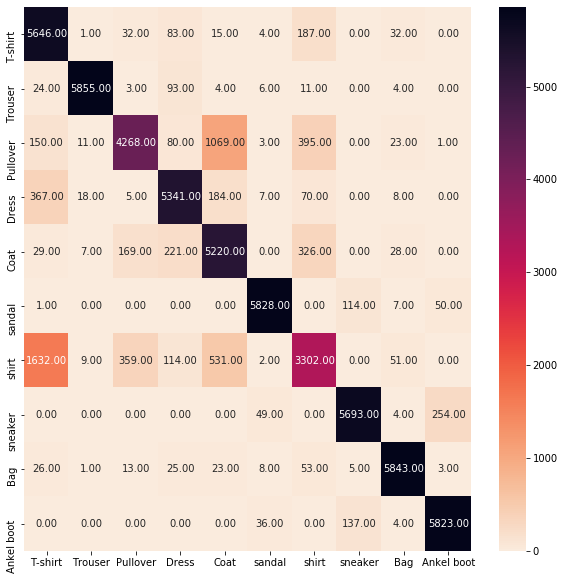

In [541]:
names = ['T-shirt' , "Trouser" , 'Pullover' , 'Dress' , 'Coat' , "sandal" ,"shirt","sneaker", "Bag" , "Ankel boot"]
plt.figure(figsize = (10,10))

ax = sns.heatmap(cmt, annot=True, cmap='rocket_r' , fmt=".2f")
ax.xaxis.set_ticklabels(names)
ax.yaxis.set_ticklabels(names)
plt.show()

#### Stack vs Concat in PyTorch , TF , numpy

* PyTorch , TF , numpy  : 

  stack : create new axis  
  concate : on existing axis
  


In [549]:
Networkk = Network()

train_loader = torch.utils.data.DataLoader(train_set , batch_size=10 , shuffle=True)#Load 
optimizer = optim .Adam (Networkk.parameters() , lr = 0.001)

for epoch in range(5):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images , labels = batch

        preds = Networkk(images) #pass Batch
        loss = F.cross_entropy(preds , labels)#calc loss

        optimizer.zero_grad() #not to accumilate
        loss.backward() #grad
        optimizer.step() #update weight

        total_loss+=loss.item()
        total_correct += get_num_correct(preds , labels)


    print("epoch : " , epoch ," Total Correct : " ,total_correct , " Loss : " , total_loss)


epoch :  0  Total Correct :  45677  Loss :  3775.046971843578
epoch :  1  Total Correct :  50901  Loss :  2464.6815026551485
epoch :  2  Total Correct :  52018  Loss :  2122.324994282564
epoch :  3  Total Correct :  52818  Loss :  1928.56826417899
epoch :  4  Total Correct :  53245  Loss :  1806.251074576052


In [545]:
parameters = dict (
    lr = [0.01 , 0.001],
    batch_size = [10,100,1000],
    shuffle = [True , False]
)

In [546]:
params_values = [v for v in parameters.values()]
params_values

[[0.01, 0.001], [10, 100, 1000], [True, False]]

In [548]:
for lr , batch_size , shuffle in product (*params_values):
    print (lr , batch_size , shuffle)

0.01 10 True
0.01 10 False
0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.001 10 True
0.001 10 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False


In [554]:
class RunBuilder ():
    @staticmethod
    def get_runs(params):
        Run = namedtuple('Run' , params.keys())
        
        runs = []
        
        for v in product (*params.values()):
            runs.append(Run(*v))
            
        return  runs

In [561]:
parameters = dict (
    lr = [0.01 , 0.001],
    batch_size = [1000,10000],
    
)
runs = RunBuilder.get_runs(parameters)
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

In [559]:
run = runs[0]
print (run.lr , run.batch_size)

0.01 1000


In [575]:
class RunManger ():
    def __init__ (self):
        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None
        
        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None
        
        self.network = None
        self.loader = None
        self.tb = None
        
        
    def begin_run(self,run,network,loader):
        self.run_start_time = time.time()
        
        self.run_params = run
        self.run_count += 1
        self.network=network
        self.loader=loader
        
        #self.tb = SummaryWriter (comment = f'-{run}')
        
        images , labels = next (iter(self.loader))
        grid = torchvision.utils.make_grid(images)
        
        #self.tb.add_image('images',grid)
        #self.tb.add_graph(self.network , images)
        
    def end_run (self):
        #self.tb.close()
        self.epoch_count = 0
    
    def begin_epoch (self):
        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = time.time()
    def end_epoch(self):

        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time

        loss = self.epoch_loss / len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)

        #self.tb.add_scalar('Loss', loss, self.epoch_count)
        #self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

        #for name, param in self.network.named_parameters():
            #self.tb.add_histogram(name, param, self.epoch_count)
            #self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
        
        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results['loss'] = loss
        results["accuracy"] = accuracy
        results['epoch duration'] = epoch_duration
        results['run duration'] = run_duration
        for k,v in self.run_params._asdict().items(): results[k] = v
        self.run_data.append(results)
        df = pd.DataFrame.from_dict(self.run_data, orient='columns')
        
        clear_output(wait = True)
        display(df)
        
        
    
    def track_loss(self , loss): 
        self.epoch_loss += loss.item() * self.loader.batch_size
    
    def track_num_correct (self , preds ,labels):
        self.epoch_num_correct += self._get_num_correct(preds , labels)
        
    @torch.no_grad()
    def _get_num_correct (self , preds ,labels):
        return preds .argmax(dim = 1).eq(labels).sum().item()
    
            
    def save(self, fileName):

        pd.DataFrame.from_dict(
            self.run_data, orient='columns'
        ).to_csv(f'{fileName}.csv')

        with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent=4)


In [576]:
parameters = dict (
    lr = [0.01 ],
    batch_size = [1000,2000],
    
)
m = RunManger ()
for run in RunBuilder.get_runs(parameters):
    Networkk = Network()

    loader = torch.utils.data.DataLoader(train_set , batch_size=run.batch_size)#Load 
    optimizer = optim .Adam (Networkk.parameters() , lr =run.lr)

    m.begin_run (run , Networkk ,loader)
    for epoch in range(5):
        m.begin_epoch()

        for batch in loader:
            images , labels = batch

            preds = Networkk(images) #pass Batch
            loss = F.cross_entropy(preds , labels)#calc loss

            optimizer.zero_grad() #not to accumilate
            loss.backward() #grad
            optimizer.step() #update weight

            m.track_loss(loss)
            m.track_num_correct(preds , labels)
        m.end_epoch()
    m.end_run()
m.save('result')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size
0,1,1,0.972528,0.628567,22.410365,22.645812,0.01,1000
1,1,2,0.502756,0.809567,21.259683,43.922903,0.01,1000
2,1,3,0.403822,0.851067,21.878775,65.814827,0.01,1000
3,1,4,0.358303,0.868017,22.453121,88.283851,0.01,1000
4,1,5,0.331161,0.876683,22.885140,111.190251,0.01,1000
5,2,1,1.405858,0.469567,21.639088,22.164804,0.01,2000
6,2,2,0.706001,0.732067,18.814978,41.001641,0.01,2000
7,2,3,0.573386,0.784267,20.429439,61.443433,0.01,2000
8,2,4,0.512722,0.809700,22.255439,83.722300,0.01,2000
9,2,5,0.473877,0.827067,21.709360,105.448991,0.01,2000


## PyTorch Dataset Normalization (Feature scaling)


In [582]:

train_set = torchvision.datasets.FashionMNIST(
root = './data/FashionMNIST', #Extract
train = True,
download = True,
transform=transforms.Compose([transforms.ToTensor()]),
#normalize
)

In [594]:
loader = DataLoader(train_set , batch_size=len(train_set) , num_workers = 1)
data = next(iter(loader))
mean=data[0].mean()
std=data[0].std()

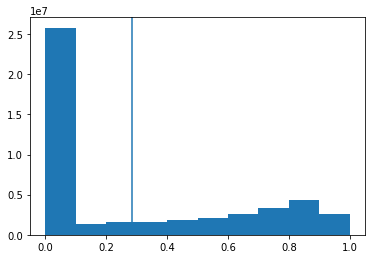

In [592]:
plt.hist (data[0].flatten())
plt.axvline(data[0].mean())

In [595]:

train_set_normal = torchvision.datasets.FashionMNIST(
root = './data/FashionMNIST', #Extract
train = True,
download = True,
transform=transforms.Compose([transforms.ToTensor() , transforms.Normalize(mean,std)]),
)

In [597]:
loader = DataLoader(train_set_normal , batch_size=len(train_set) , num_workers = 1)
data= next(iter(loader))
data[0].mean(), data[0].std() #0 1 main obj

(tensor(-2.9106e-08), tensor(1.))

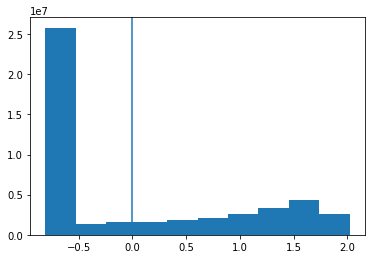

In [598]:
plt.hist (data[0].flatten())
plt.axvline(data[0].mean())

In [599]:
trainsets = {"not_normal" : train_set , "normal" : train_set_normal}

In [603]:
parameters = dict (
    lr = [0.01 ],
    batch_size = [100],
    num_workers =[1],
    trainset= ['not_normal' , 'normal']
    
)
m = RunManger ()
for run in RunBuilder.get_runs(parameters):
    Networkk = Network()

    loader = torch.utils.data.DataLoader(trainsets[run.trainset] , batch_size=run.batch_size , num_workers=run.num_workers)#Load 
    optimizer = optim .Adam (Networkk.parameters() , lr =run.lr)

    m.begin_run (run , Networkk ,loader)
    for epoch in range(20):
        m.begin_epoch()

        for batch in loader:
            images , labels = batch

            preds = Networkk(images) #pass Batch
            loss = F.cross_entropy(preds , labels)#calc loss

            optimizer.zero_grad() #not to accumilate
            loss.backward() #grad
            optimizer.step() #update weight

            m.track_loss(loss)
            m.track_num_correct(preds , labels)
        m.end_epoch()
    m.end_run()
m.save('result')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,trainset
0,1,1,0.583555,0.778400,20.374712,23.014804,0.01,100,1,not_normal
1,1,2,0.409203,0.849550,19.554527,42.589958,0.01,100,1,not_normal
2,1,3,0.375384,0.860683,25.653745,68.267575,0.01,100,1,not_normal
3,1,4,0.357378,0.866200,22.145278,90.441089,0.01,100,1,not_normal
4,1,5,0.347530,0.871983,24.699917,115.178218,0.01,100,1,not_normal
5,1,6,0.336867,0.875650,23.907470,139.111878,0.01,100,1,not_normal
6,1,7,0.337668,0.875867,22.184599,161.313734,0.01,100,1,not_normal
7,1,8,0.330253,0.877717,22.298139,183.647262,0.01,100,1,not_normal
8,1,9,0.326381,0.881033,24.479533,208.149292,0.01,100,1,not_normal
9,1,10,0.324160,0.879933,27.379008,235.594556,0.01,100,1,not_normal


## PyTorch Sequential Models 

In [606]:
image , label = train_set[0]
image.shape

torch.Size([1, 28, 28])

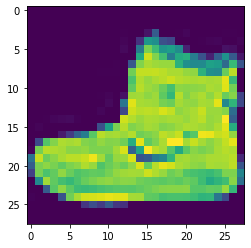

In [607]:
plt.imshow(image.squeeze())

In [608]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [619]:
in_features = image.numel()
out_features = math.floor(in_features / 2 )
out_classes = len(train_set.classes)

In [622]:
network1 = nn.Sequential(
    nn.Flatten (start_dim = 1),
    nn.Linear(in_features , out_features),
    nn.Linear(out_features,out_classes)
)
network1

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [623]:
network1[1]

Linear(in_features=784, out_features=392, bias=True)

In [624]:
image = image . unsqueeze(0)
image.shape

torch.Size([1, 1, 1, 28, 28])

In [625]:
network1(image)

tensor([[-0.0923,  0.0840,  0.2670,  0.3973,  0.0824,  0.1457,  0.0507,  0.1029,  0.1829, -0.1642]],
       grad_fn=<AddmmBackward0>)

In [626]:
layers = OrderedDict([
    ( 'flat' , nn.Flatten (start_dim = 1)),
    ('hidden',nn.Linear(in_features , out_features)),
    ('output',nn.Linear(out_features,out_classes))
])

network2 = nn.Sequential(layers)
network2

Sequential(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden): Linear(in_features=784, out_features=392, bias=True)
  (output): Linear(in_features=392, out_features=10, bias=True)
)

In [629]:
network2(image)

#diff classes as weight are random without specifing the seed

tensor([[ 0.2664,  0.0198, -0.1054, -0.2437, -0.1267, -0.0475,  0.1451, -0.1191, -0.3133, -0.1063]],
       grad_fn=<AddmmBackward0>)

## Batch Norm in PyTorch

In [634]:
torch.manual_seed(50)
network1 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [635]:
torch.manual_seed(50)
network2 = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.BatchNorm2d(6)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.BatchNorm1d(120)
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)

In [640]:
networks = {
    'no_batch' : network1 ,
    "batch_norm": network2
}
networks.keys()

dict_keys(['no_batch', 'batch_norm'])

In [643]:
parameters = dict (
    lr = [0.01 ],
    batch_size = [1000],
    num_workers =[1],
    trainset= ['normal'],
    network = list (networks.keys())
    
)
m = RunManger ()
for run in RunBuilder.get_runs(parameters):
    Networkk = networks[run.network]

    loader = torch.utils.data.DataLoader(trainsets[run.trainset] , batch_size=run.batch_size , num_workers=run.num_workers)#Load 
    optimizer = optim .Adam (Networkk.parameters() , lr =run.lr)

    m.begin_run (run , Networkk ,loader)
    for epoch in range(5):
        m.begin_epoch()

        for batch in loader:
            images , labels = batch

            preds = Networkk(images) #pass Batch
            loss = F.cross_entropy(preds , labels)#calc loss

            optimizer.zero_grad() #not to accumilate
            loss.backward() #grad
            optimizer.step() #update weight

            m.track_loss(loss)
            m.track_num_correct(preds , labels)
        m.end_epoch()
    m.end_run()
m.save('result')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,trainset,network
0,1,1,0.266706,0.902033,14.456736,15.964482,0.01,1000,1,normal,no_batch
1,1,2,0.255352,0.906200,14.104518,30.078030,0.01,1000,1,normal,no_batch
2,1,3,0.240037,0.910900,14.517347,44.603555,0.01,1000,1,normal,no_batch
3,1,4,0.236030,0.911433,14.550290,59.162822,0.01,1000,1,normal,no_batch
4,1,5,0.233873,0.912783,14.352612,73.525381,0.01,1000,1,normal,no_batch
5,2,1,0.170360,0.935300,13.503018,15.151994,0.01,1000,1,normal,batch_norm
6,2,2,0.150269,0.941417,12.477361,27.639329,0.01,1000,1,normal,batch_norm
7,2,3,0.140944,0.945617,12.994239,40.644539,0.01,1000,1,normal,batch_norm
8,2,4,0.133213,0.948833,14.575830,55.231340,0.01,1000,1,normal,batch_norm
9,2,5,0.128215,0.950700,14.129640,69.372456,0.01,1000,1,normal,batch_norm


In [644]:
pd.DataFrame.from_dict(m.run_data).sort_values('accuracy' , ascending = False)

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,trainset,network
9,2,5,0.128215,0.950700,14.129640,69.372456,0.01,1000,1,normal,batch_norm
8,2,4,0.133213,0.948833,14.575830,55.231340,0.01,1000,1,normal,batch_norm
7,2,3,0.140944,0.945617,12.994239,40.644539,0.01,1000,1,normal,batch_norm
6,2,2,0.150269,0.941417,12.477361,27.639329,0.01,1000,1,normal,batch_norm
5,2,1,0.170360,0.935300,13.503018,15.151994,0.01,1000,1,normal,batch_norm
4,1,5,0.233873,0.912783,14.352612,73.525381,0.01,1000,1,normal,no_batch
3,1,4,0.236030,0.911433,14.550290,59.162822,0.01,1000,1,normal,no_batch
2,1,3,0.240037,0.910900,14.517347,44.603555,0.01,1000,1,normal,no_batch
1,1,2,0.255352,0.906200,14.104518,30.078030,0.01,1000,1,normal,no_batch
0,1,1,0.266706,0.902033,14.456736,15.964482,0.01,1000,1,normal,no_batch


## Training Multiple Networks

In [648]:
class NetworkFactory():
    @staticmethod
    def get_network(name):
        if name == 'network':
            torch.manual_seed(50)
            return nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
                , nn.ReLU()
                , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
                , nn.ReLU()
                , nn.MaxPool2d(kernel_size=2, stride=2)
                , nn.Flatten(start_dim=1)  
                , nn.Linear(in_features=12*4*4, out_features=120)
                , nn.ReLU()
                , nn.Linear(in_features=120, out_features=60)
                , nn.ReLU()
                , nn.Linear(in_features=60, out_features=10)
            )
        else:
            return None

In [649]:
parameters = dict (
    lr = [0.01 ],
    batch_size = [1000],
    num_workers =[1],
    trainset= ['normal'],
    network = ['network']
    
)
m = RunManger ()
for run in RunBuilder.get_runs(parameters):
    Networkk = NetworkFactory.get_network(run.network)

    loader = torch.utils.data.DataLoader(trainsets[run.trainset] , batch_size=run.batch_size , num_workers=run.num_workers)#Load 
    optimizer = optim .Adam (Networkk.parameters() , lr =run.lr)

    m.begin_run (run , Networkk ,loader)
    for epoch in range(5):
        m.begin_epoch()

        for batch in loader:
            images , labels = batch

            preds = Networkk(images) #pass Batch
            loss = F.cross_entropy(preds , labels)#calc loss

            optimizer.zero_grad() #not to accumilate
            loss.backward() #grad
            optimizer.step() #update weight

            m.track_loss(loss)
            m.track_num_correct(preds , labels)
        m.end_epoch()
    m.end_run()
m.save('result')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,trainset,network
0,1,1,0.901361,0.666083,13.513345,15.117229,0.01,1000,1,normal,network
1,1,2,0.477679,0.819450,12.925820,28.054020,0.01,1000,1,normal,network
2,1,3,0.394250,0.854967,14.535953,42.598966,0.01,1000,1,normal,network
3,1,4,0.354669,0.868567,15.376772,57.986723,0.01,1000,1,normal,network
4,1,5,0.330811,0.876133,14.299335,72.296034,0.01,1000,1,normal,network
